# Storytelling Data Visualization Lab

In this lab you'll use a dataset called `housing_prices.csv` which contains the sales data of houses. The dataset and descriptions of the columns are available from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). For your convenience, you can review the descriptions of the data columns from [here](data-description.txt).

Pretend you are a data analyst at an investment company where the board decided to make investments in real estates. Your boss asked you to analyze this housing sales dataset and present to the investment managers on **what features of houses are strong indicators of the final sale price**. You need to present your findings in intuitive ways so that the investment managers understand where your conclusions come from.

#### You will use the appropriate data visualization graphs to tell your stories.

## Challenge 1 - Understanding the Dataset

After receiving the data and clarifying your objectives with your boss, you will first try to understand the dataset. This allows you to decide how you will start your research in the next step.

#### First, import the basic libraries and the dataset.

In [91]:
! pip install category_encoders


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import stats


In [4]:
df = pd.read_csv('housing_prices.csv')

In [5]:
def percentage_MV_over20percent(df):
    missing_columns = [x for x in list(df.columns) if df[x].isnull().sum()/len(df[x])>0.2]
    d = {}
    for x in missing_columns:
        d[x]= df[x].isnull().sum()/len(df[x])
    
    missing_values = pd.DataFrame(d, index=['percentage of missing values'])
    return missing_values.transpose(), missing_columns

In [6]:
def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

#### As a routine before analyzing a dataset, print the first few rows of the dataset

In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


You find the dataset has 81 columns which are a lot. 

#### Since the column `Id` is meaningless in our data visualization work, let's drop it

In [8]:
# your code here
del df['Id']

You care about missing values. If a column has too many missing values, it is not reliable to use it to predict sales price.

#### In the cell below, calculate the percentage of missing values for each column. 

Make a table containing the column name and the percentage of missing values. Print the columns where more than 20% of values are missing. An example of your output looks like:

![Missing Values](missing-values.png)

[This reference](https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset) can help you make the missing values table.

In [9]:
missing_columns = [x for x in list(df.columns) if df[x].isnull().sum()/len(df[x])>0.2]

0

In [25]:
# your code here


In [10]:
percentage_MV_over20percent(df)

(             percentage of missing values
 Alley                            0.937671
 FireplaceQu                      0.472603
 PoolQC                           0.995205
 Fence                            0.807534
 MiscFeature                      0.963014,
 ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'])

#### Drop the columns you find that have more than 20% missing values.

After dropping, check the shape of your dataframes. You should have 75 columns now.

In [11]:
# your code here
for x in percentage_MV_over20percent(df)[1]:
    del df[x]

In [12]:
df.shape

(1460, 75)

Since you're asked to analyze sale prices, first let's see if the sale prices (column `SalePrice`) has a normal distribution. This is important because normally distributed data can be better represented with mathematical models.

#### In the cell below, use the propriate graph to visualize the shape of distribution of the sale prices. Then explain what you find from the graph about data distribution.

C:\Users\leube\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

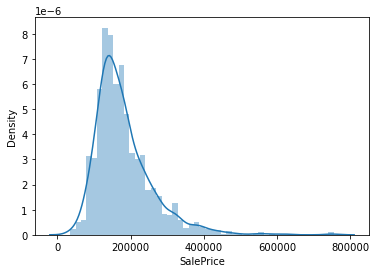

In [13]:
# your code here
sns.distplot(df['SalePrice'])


# right skewed

In [14]:
df['SalePrice'].skew()

1.8828757597682129

In [15]:
df['SalePrice'].kurt()

6.536281860064529

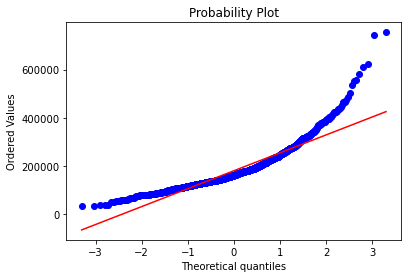

In [18]:
stats.probplot(df.SalePrice,plot=pylab);

In [17]:
import scipy.stats as stats
import pylab

In [20]:
# your comment here
# right skewed, high kurtosis --> no normal ditribution


## Challenge 2 - Adjust Data Distribution

If you used the correct method in the previous step, you should have found the data distribution is skewed to the left. In order to improve your data visualization in the next steps, you can opt to adjust the `SalePrice` column by applying a mathematical function to the values. The goal is to produce a bell-shape normal distribution after applying the mathematical function to the sale price.

*This technique is optional in data visualization but you'll find it useful in your future machine learning analysis.*

#### In the cell below, adjust the `SalePrice` column so that the data are normally distributed.

Try applying various mathematical functions such as square root, power, and log to the `SalePrice` column. Visualize the distribution of the adjusted data until you find a function that makes the data normally distributed. **Create a new column called `SalePriceAdjusted` to store the adjusted sale price.**

[This reference](https://trainingdatascience.com/workshops/histograms-and-skewed-data/) shows you examples on how to adjust skewed data.

In [21]:
# your code here
df['price_reciprocal']=1/df['SalePrice']
df['price_log']=np.log(df['SalePrice'])

In [22]:
df['price_sqroot']=np.sqrt(df.SalePrice)

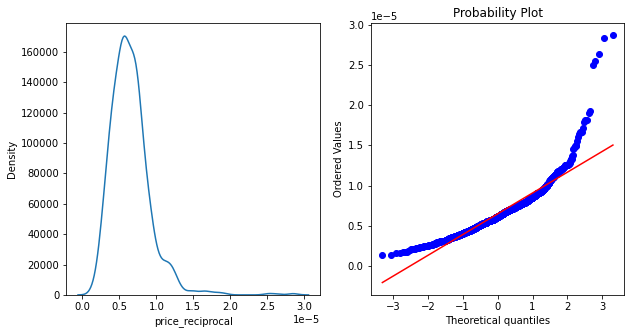

In [23]:
normality(df,'price_reciprocal')

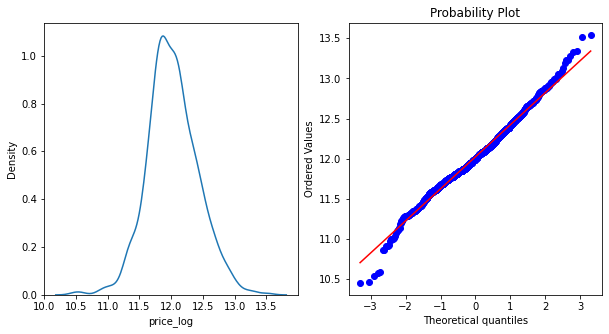

In [74]:
normality(df,'price_log')

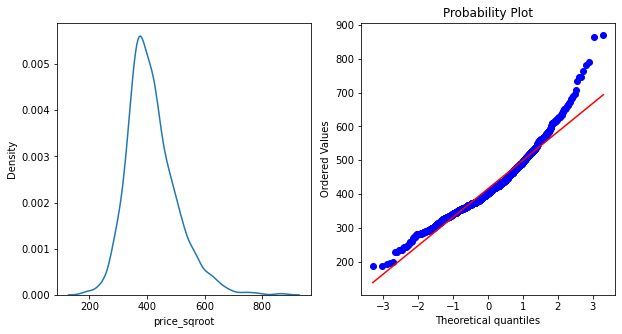

In [75]:
normality(df,'price_sqroot')

using log to normalize, seems like best approach to normalize data

## Challenge 3 - Exploring Data with Common Sense

Now that we have a general understanding of the dataset, we start exploring the data with common sense by means of data visualization. Yes, in data analysis and even machine learning you are often required to use common sense. You use your common sense to make a scientific guess (i.e. hypothesis) then use data analytics methods to test your hypothesis.

This dataset is about housing sales. According to common sense, housing prices depend on the following factors:

* **Size of the house** (`GrLivArea`, `LotArea`, and `GarageArea`).

* **Number of rooms** (`BedroomAbvGr`, `KitchenAbvGr`, `FullBath`, `HalfBath`, `BsmtFullBath`, `BsmtHalfBath`).

* **How long the house has been built or remodeled** (`YearBuilt` and `YearRemodAdd`).

* **Neighborhood of the house** (`Neighborhood`).

#### In this challenge, use the appropriate graph type to visualize the relationships between `SalePrice` (or `SalePriceAdjusted`) and the fields above. 

Note that:

* Transform certain columns in order to visualize the data properly based on common sense. For example:
    * Visualizing how the number of half bathrooms affected the sale price probably does not make sense. You can create a new column to calculate the total number of bathrooms/rooms then visualize with the calculated number.
    * `YearBuilt` and `YearRemodAdd` are year numbers not the age of the house. You can create two new columns for how long the house has been built or remodeled then visualize with the calculated columns.
* Make comments to explain your thinking process.

In [80]:
# your code here

# add cells as needed

In [24]:
df['Houseage'] = 2022-df['YearBuilt']
df['RenovatedAge'] = 2022-df['YearRemodAdd']

In [25]:
df['TotalBathrooms'] = df['BsmtFullBath']+df['BsmtHalfBath']+df['FullBath']+df['HalfBath']

In [26]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [27]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['Neighborhood'])
# LabelEncoder()

# array([1, 2, 6])
#le.transform([1, 1, 2, 6])

LabelEncoder()

In [28]:
df['neighborhood_encoded'] = le.transform(df['Neighborhood'])

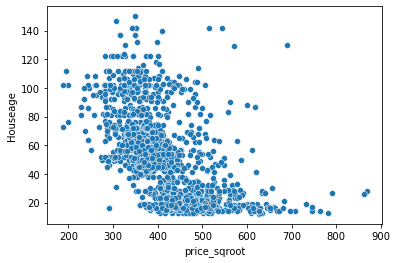

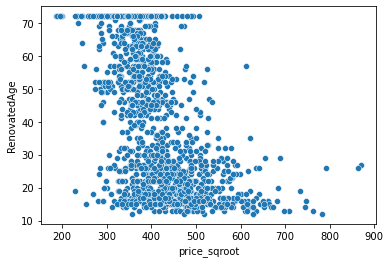

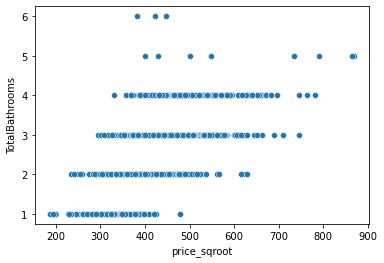

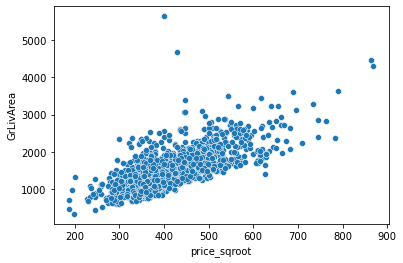

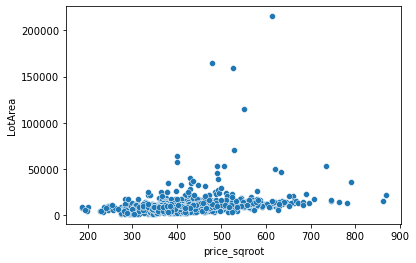

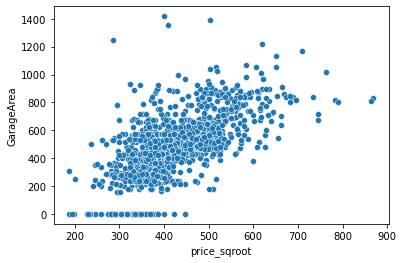

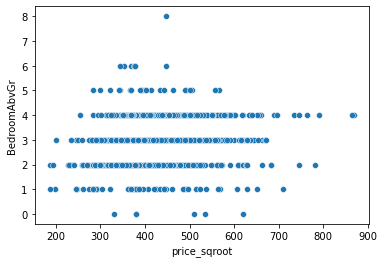

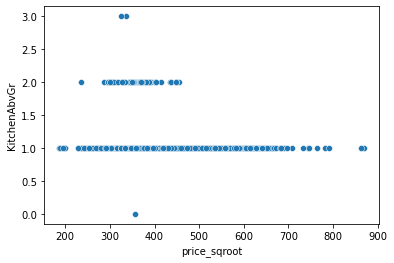

In [29]:
lst = ['Houseage','RenovatedAge','TotalBathrooms','GrLivArea','LotArea','GarageArea','BedroomAbvGr','KitchenAbvGr'] 

for i in lst:
    sns.scatterplot(data=df, x="price_sqroot", y=i)
    plt.show()


relation between Saleprice and:
Garage area (slightly)
living area

In [ ]:
# gr living area, garage area

In [101]:
# find relation between price and neighbourhood



0.21085146582230346

## Challenge 4 - Exploring Data with Correlation Heatmap

Now you have explored data visualizations with certain fields based on common sense. In the dataset there are many other fields that you are not sure whether they are important factors for the sale price. What is the best way to explore those fields without investigating them individually?

Making scatter matrix is not an option here because there are too many fields which makes it extremely time consuming to create scatter matrix. One option you have is to create a heatmap. Heatmaps are much less expensive to create than scatter matrixes. You can use heatmaps to visualize the pairwise correlations between each two variables.

Here is a [reference](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) you can use to learn how to creat the pairwise correlation heatmap. Your heatmap should look like below:

![Corr Heatmap](heatmap.png)

In [30]:
# your code here
del df['YearBuilt']
del df['YearRemodAdd']

In [31]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
corr = df.corr()

In [38]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

<AxesSubplot:>

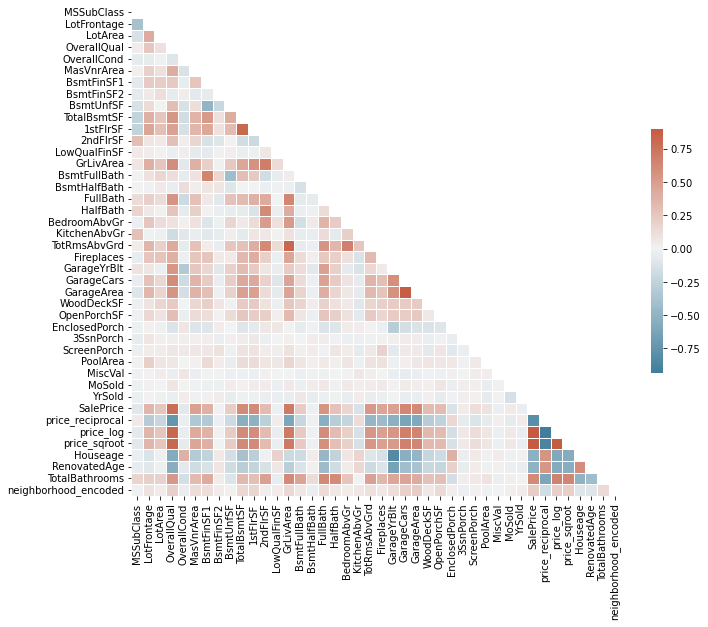

In [40]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr,mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In your heatmap, you can easily identify the highly correlated (either positively or negatively) variables by looking for the grids with darker colors. 

#### In the cell below, summarize what variables are highly correlated to the sale price?

In [ ]:
# your comment here
'''

but many of those high correlations between certain variable and Salesprice, which make sense because all of those factors 
displayed have an effect on the salesprice

examples:
over all quality has the highest correlation with salesprice, other highly corelated variables e.g. gr. living area, garage
are/garage cars first and second floor area
'''


## Challenge 5 - Present Your Stories

Now based on your findings from the explorations, summarize and present your stories.

#### Present the top 5 factors that affect the sale price.

Use the following format to present each factor:

1. A title line about the factor.

1. No more than 3 sentences to describe the relationship between the factor and the sale price.

1. Support your point with the appropriate graph.

In [ ]:
# your responses here
# add cells as needed

# livng area

compared to othe variables, we can observe a relatively clear linear relationship  between the price ad the size of the living aea, the bigger the living area the higher the price of your price

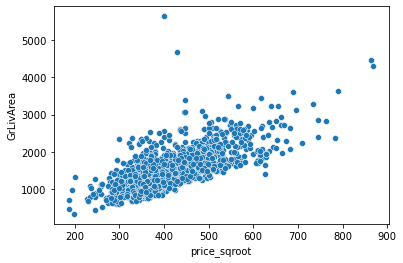

In [41]:
sns.scatterplot(data=df, x="price_sqroot", y='GrLivArea')
plt.show()

# garage area

similar to the conclusion above, here space is lost for people to place their cars safely on their territory, the owner therefore loses potential space to further build houses etc. one which is way a big garage area goes with a high price, the higher the area the higher the price

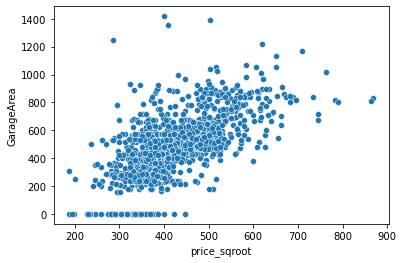

In [42]:
sns.scatterplot(data=df, x="price_sqroot", y='GarageArea')
plt.show()

# house age

a very interesting relationship with the salesprice, you can see a very unclear but still tangible negative linear relationship between those two factors, the older the house, the less modern , the lower the price we can genrelally conclude, but the relationship here is so unclear because numbe rof cases house age can actually increase the price, when the house is till in good sahpe and has extra charm because of its age the price might be high despite its lacking modernity 

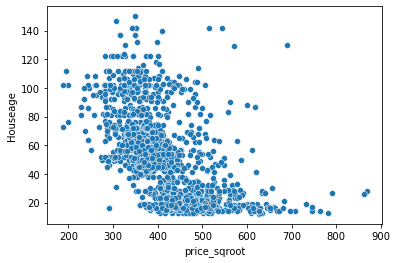

In [44]:
sns.scatterplot(data=df, x="price_sqroot", y='Houseage')
plt.show()

# recent renovation

here we can observe a similar phenomenon as we had with the previous variabk, one would suspect that the more recent the renovation the more modern the asset and the higher its price, there is a very spread negative linear relationship graphing this idea, but the reason why it is so spread and unclear for a number of assets is once again the idea that old charm and old style like buildings (if still in good shape) have its uniqueness and with that a certain price you have to pay

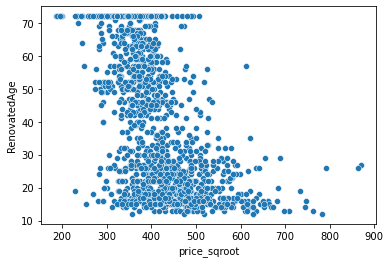

In [46]:
sns.scatterplot(data=df, x="price_sqroot", y='RenovatedAge')
plt.show()

# over all quality

not sure how this is calculated by what kind of inex, but relationship here more or less clear, logically and represented by a  linear relationship from line to line, the higher or better the quality the higher the price, thos esteps in lines are very interesting to observe here, shows that a part fro the general linear relationship here the price also depends on multiple other factors here dislayed by increasing prices before an increase in quality

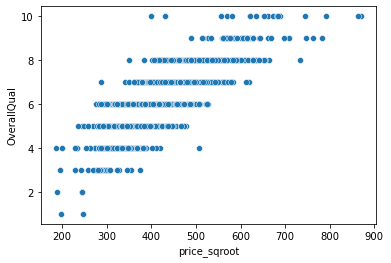

In [45]:
sns.scatterplot(data=df, x="price_sqroot", y='OverallQual')
plt.show()